In [3]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import copy
# Все размерности в СИ (кг, м, с), кроме исключений, которые указаны
'''Задание ограничений модели(разделение по зонам) - class FindMin, функция check'''

'Задание ограничений модели(разделение по зонам) - class FindMin, функция check'

In [4]:
class Container:
    
    box_lenght_20 = 6.058
    box_lenght_40 = 12.192
    box_lenght_45 = 13.6
    box_height = 2.6
    box_width = 2.44
    
    def __init__(self, size, mass, company_inf):
        self.size = size #20, 40
        self.mass = mass #кг
        self.company_inf = company_inf
        if self.size == 20:
            self.box_lenght = 6.058
        if self.size == 40:
            self.box_lenght = 12.192
        if self.size == 45:
            self.box_lenght = 13.6

In [38]:
class Stock(Container):
 
    # x - контейнеры в длину, y -контейнеры в ширину
    def __init__(self, x, y, z, company_inf):
        self.matrix = np.zeros([z, y, x], dtype = 'int')
        self.matrix_out = np.zeros([y, x], dtype = 'int')
        self.restrictions = [[0, 0] for i in range(x)]

        self.x = x #длина
        self.y = y #ширина
        self.z = z #высота
        self.company_inf = company_inf
        self.row_list = [0 for i in range(self.x)]
        self.column_list = [1 for i in range(self.y)]
        self.changes = []
        self.container_positions = np.zeros([y, x])
        self.container_positions_center = np.zeros([y, x]) #Центры контейнеров
        
    def check_put_box(self, x, y, z):
        #говорит, можно ли ставить в ячейку или нет (условия складирования)
        if self.matrix[z, y, x] == 1:
            return False
        else:
            return True
        
    def load_stock(self, n):
        if n > self.x * self.y * self.z:
            raise ValueError('Склад переполнен!') 
        while n != 0:
            put_x = random.randint(0, self.x - 1)
            put_y = random.randint(0, self.y - 1)
            put_z = random.randint(0,self.z - 1)
            result = self.check_put_box(put_x, put_y, put_z)
            if result:
                self.matrix[put_z, put_y, put_x] = 1
                n -= 1
        
        for i in range(self.z): #формирование 2 мерной матрицы
            for j in range(self.y):
                for k in range(self.x):
                    self.matrix_out[j, k] += self.matrix[i,j,k]
        temp_matrix = np.transpose(self.matrix_out)
        self.matrix_out = temp_matrix
        self.changes.append(self.matrix_out)
                    
    #Добавление матрицы соответствия ряда
    def load_row_list_random(self):
        container_size = [20, 40]
        for i in range(self.x):
            self.row_list[i] = Container(random.choice(container_size), "row", random.choice(self.company_inf))
            
    def load_row_list(self, rows):
        if len(row_list) != self.x:
            raise ValueError ('Количество введенных данных о рядах не совпадает с данными склада')
        for i, val in enumerate(rows):
            self.row_list[i] = Container(rows[i], "row", random.choice(self.company_inf))

    #Добавление ряда соответствия колонок (порожний, непорожний)
    def load_column_list(self):
        container_mass = [0, 'full']
        for i in range(self.y):
            self.column_list[i] = random.choice(container_mass)
        return self.column_list
    
    #def lokations_of_containers(self, x_start, y_start):
        #for i in range(len(self.container_positions)):
            

In [39]:
st = Stock(10, 5, 3, '')
st.load_stock(50)
print(st.matrix_out)

st.container_positions[0][0] = [0, 0]
print(st.container_positions)

[[2 2 2 1 1]
 [2 0 1 0 0]
 [0 2 1 2 1]
 [0 1 2 0 0]
 [1 2 2 2 1]
 [2 1 1 3 1]
 [0 1 1 0 1]
 [0 0 1 2 1]
 [2 0 0 1 0]
 [0 2 1 1 0]]


ValueError: setting an array element with a sequence.

In [6]:
#Рандом переработать на основе статистики с системы дистанционного мониторинга (распределение масс) Важно для динамики

In [7]:
class Train(Stock):
    '''Запускать только один раз, иначе меняет все данные заново'''
    
    def __init__(self, num_containers, company_inf):
        self.num_containers = num_containers #число контейнеров в поезде
        self.company_inf = company_inf #Массив из компаний или направлений
        self.train = [[0] for i in range(self.num_containers)]
        
    def load_train(self):
        container_size = [20, 40] 
        for i in range(self.num_containers):
            self.train[i] = Container(random.choices(container_size, weights=[60, 40])[0], random.choice(np.arange (2, 45, 0.1)), random.choice(self.company_inf))
            #np.arrange() - массив масс по нормальному распределению
            #random.choices([20, 40], weights=[60, 40]) - Выбор размера с вероятностью 60/40


In [8]:
class Crane: 
    
    def __init__(self, v_crane, v_trolley, v_up, max_hight, span, console_1, console_2):
        self.v_crane = v_crane # m/min
        self.v_up = v_up # m/min
        self.v_trolley = v_trolley # m/min
        self.max_hight = max_hight #максимальная высота подъема спредера, м
        self.span = span #пролет
        self.console_1 = console_1 #Консоль отчета(ближайшая к 0)
        self.console_2 = console_2 #Дальняя консоль
        self.road = []
        self.trains_positions = []
        
    def down_train(self, n, train_heigh = 0): #Опускание спредера до n-го контейнера
        return [self.max_hight - (n + 1) * Stock.box_height - train_heigh,
                (self.max_hight - (n + 1) * Stock.box_height - train_heigh)/self.v_up]#мин
    
    def up_train(self, z): #Подъем спредера на расстояние z, м
        return [z, z/self.v_up]
    
    def trolley_move(self, y1, y2): #Движение тележки, размеры y1 и y2 - метры
        return [abs(y1-y2), abs(y1-y2)/self.v_trolley] #мин
    
    def crane_move(self, x1, x2): #Движение крана
        return [abs(x1-x2), abs(x1-x2)/self.v_crane] #мин
    
    #Сумма времени цикла считать отдельно в программе

In [9]:
'''Сохранять массив времен!!!'''

'Сохранять массив времен!!!'

In [10]:
#Алгоритм по наименьшим расстояниям

class Min_distances(Crane):
    
    '''Принимает на вход: 
            1. положение x крана
            2. Положение y тележки
            3. МАССИВ ссылок на объекты типа Container
            4. Обект типа Crane
    '''
    
    def __init__(self, x_crane, y_crane, train, Crane, stock):
        self.x_crane = x_crane
        self.x_start = copy.copy(x_crane)
        self.y_crane = y_crane
        self.y_start = copy.copy(y_crane)
        self.train = train
        self.crane = Crane
        self.stock = stock
        self.time_train = []
        self.road = []
        self.box_positions_stock = [0]
        self.box_positions_train = [0]
        self.matrix_current = copy.copy(self.stock.changes[len(stock.changes) - 1])
        #print(self.matrix_current)
        self.road_times = [] #последовательная запись времен
        
        #Массивы расстояний нахождения контейнеров на поезде и на складе
        for i in range(len(self.train)):
            self.box_positions_train.append(self.train[i].box_lenght/2 + 1 + self.box_positions_train[i]) # 1 - Среднее расстояние между вагонами/2
        self.box_positions_train.pop(0)
        box_train = copy.copy(self.box_positions_train)
        self.crane.trains_positions.append(box_train)
        
        for i in range(len(self.stock.matrix_out)):
            self.box_positions_stock.append(self.stock.row_list[i].box_lenght/2 + 0.5 + self.box_positions_stock[i])
            # 0,5 - Среднее расстояние между контейнерами
        self.box_positions_stock.pop(0)
        
        
    def time_to_train(self): #Массив времен от положения крана до поезда 
        for i in range(len(self.train)):
            move_time_crane = self.crane.crane_move(self.x_crane, self.box_positions_train[i])
            move_time_trolley = self.crane.trolley_move(self.y_crane, self.crane.span)
            move_time_down = self.crane.down_train(0, train_heigh = 1.5) #z - высота опускания/подъема
            self.time_train.append(move_time_trolley[1])
            # 0.5 - Время на позиционирование + захват
        return self.time_train
    
    def check(self, index_train, index_stock_x, index_stock_y): #Проверка соответствия по типу контейнера
        if self.matrix_current[index_stock_x][index_stock_y] == self.stock.z:
            return False
        elif self.train[index_train].size == self.stock.row_list[index_stock_x].size:
            return True
        #else:
            #return False
    
    def time_to_box(self): #Массив матриц времен от положения крана до поезда + до ячейки на складе (полный цикл)

        times_list = []
        self.time_to_train()
        coefficent = [1.3, 1.2, 1.1, 1]
        
        for i in range(len(self.train)): #поезд
            temp_matrix = np.zeros([self.stock.x, self.stock.y])
            for j in range(len(self.stock.matrix_out)): #Длина склада
                #if self.stock.row_list[j].size == self.train[i].size:
                    for k in range(len(temp_matrix[j])): # ширина склада
                        if self.check(i, j, k) == False:
                            temp_matrix[j][k] = None
                        else:
                            #Расчет движений крана - х и тележки y
                            move_crane_x = self.crane.crane_move(self.box_positions_train[i], self.box_positions_stock[j])
                            move_crane_y = self.crane.trolley_move(0, self.train[i].box_width * k + 3)
                            #Движение от поезда (0 - консоль), 3 - длина консоли, до k-го контейнера в ряде
                            
                            time_x = (self.time_train[i] + move_crane_x[1])
                            time_y =  move_crane_y[1] + self.time_train[i]
                            time_down = self.crane.down_train(self.stock.matrix_out[j][k])
                            
                            temp_matrix[j][k] = (time_y + time_down[1]) * coefficent[self.matrix_current[j][k]]
            times_list.append(temp_matrix)
            
        return times_list
    
    def find_min(self): #Генерация вариантов и нахождение минимума, запись индекса мин элемента
        min_time=[]
        temp_time = self.time_to_box()
        temp_min = 10000
        temp_road = []
        road_temp = []
        for i in range(len(temp_time)):
            if self.train[i].size == None:
                continue
            for j in range(len(temp_time[0])):
                for k in range(len(temp_time[0][0])):
                    if temp_time[i][j][k] == None:
                        continue
                    if temp_time[i][j][k] < temp_min:
                        temp_min = temp_time[i][j][k]
                        temp_road = [i, j, k]
                        road_temp = [i, [j, k, self.matrix_current[j][k]]]        
        self.road_times.append(temp_min)
        self.road.append(road_temp) #[i, [j, k, z]] - i - номер вагона, j - номер ряда (x), k - номер в ряде 
        self.x_crane = self.box_positions_stock[road_temp[1][0]]
        self.y_crane = k * Container.box_width
        self.matrix_current[temp_road[1]][temp_road[2]] += 1
        self.train[temp_road[0]].size = None
        return temp_min
    
        
    def algoritm_body(self):
        if len(self.train) > self.stock.x * self.stock.y * self.stock.z - sum(sum(self.stock.changes[len(self.stock.changes)-1])):
            raise ValueError ('Склад будет переполнен. Нельзя разгрузить данный поезд')
        time_sum = 0 
        for i in range(len(self.train)):
            time_sum += self.find_min()
        self.stock.changes.append(self.matrix_current)
        print('ЗАПИСЬ matrix_current, поезд разгрузка')
        self.crane.road.append(self.road)
        return time_sum


In [19]:
ekb = Stock(17, 7, 3, ['sud', 'west', 'ost', 'nord'])
ekb.load_stock(190)
row_list = [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 40, 40, 20, 20, 20, 40, 40]
ekb.load_row_list(row_list)
ekb_crane = Crane(50, 30, 17, 9.5, 25, 4, 4)

tr_1 = Train(25, [1, 2])
tr_1.load_train()
minn = Min_distances(0, 20, tr_1.train, ekb_crane, ekb)
minn.algoritm_body()
print(ekb_crane.road)
print(ekb.changes[0])

ЗАПИСЬ matrix_current, поезд разгрузка
[[[0, [4, 0, 2]], [1, [7, 0, 2]], [2, [10, 0, 2]], [3, [11, 0, 2]], [4, [15, 0, 2]], [5, [1, 1, 2]], [6, [15, 1, 2]], [7, [16, 1, 2]], [8, [0, 2, 2]], [9, [4, 2, 2]], [10, [6, 2, 2]], [11, [7, 2, 2]], [12, [8, 2, 2]], [13, [9, 2, 2]], [14, [12, 2, 2]], [15, [13, 2, 2]], [16, [15, 2, 2]], [17, [0, 0, 1]], [18, [0, 0, 2]], [19, [1, 0, 1]], [20, [1, 0, 2]], [21, [2, 0, 1]], [22, [2, 0, 2]], [23, [6, 0, 1]], [24, [6, 0, 2]]]]
[[1 1 2 3 0 0 2]
 [1 2 3 1 2 1 2]
 [1 0 3 1 2 2 2]
 [3 1 1 1 2 1 2]
 [2 0 2 1 2 2 1]
 [3 3 1 1 1 2 1]
 [1 1 2 2 3 0 3]
 [2 3 2 1 2 0 2]
 [1 3 2 1 2 1 1]
 [1 1 2 0 1 2 2]
 [2 1 0 2 2 2 1]
 [2 1 1 1 1 2 1]
 [3 1 2 1 2 2 0]
 [3 3 2 2 1 1 3]
 [1 3 1 2 1 1 1]
 [2 2 2 1 2 3 2]
 [1 2 3 2 0 2 2]]


In [20]:
a = [1, 2, 3, 4, 5]
for i in enumerate(5):
    print(i)

TypeError: 'int' object is not iterable

In [10]:
class Unloading(Crane):
    
    '''cell - номер ячейки (все числа от 0)
    i - номер ряда, j - номер в ряде, k - в высоту'''
    
    def __init__(self, Crane, Stock, Container, cell, crane_x, crane_y):
        self.road_unloading = []
        self.crane = Crane
        self.stock = Stock
        self.container = Container
        self.cell = cell #[x, y, z]
        self.crane_x = crane_x
        self.crane_y = crane_y
        self.matrix_current = copy.copy(self.stock.changes[len(self.stock.changes)-1])
        self.time_cycle_full = 0
        self.box_positions_on_stock = [0]
        self.road_times = []
        
        #print('матрица вначале \n',self.matrix_current)
        
        for i in range(len(self.matrix_current)):
            self.box_positions_on_stock.append(self.stock.row_list[i].box_lenght/2 + 0.2 + self.box_positions_on_stock[i]) # 0,2 - Среднее расстояние между контейнерами
        self.box_positions_on_stock.pop(0)
        
    def find_container(self):
        if self.matrix_current[self.cell[0]][self.cell[1]] != 0 and self.matrix_current[self.cell[0]][self.cell[1]] >= self.cell[2] + 1 and self.container.size == self.stock.row_list[self.cell[0]].size:
            return True
        elif self.matrix_current[self.cell[0]][self.cell[1]] <= self.cell[2] + 1 or self.matrix_current[self.cell[0]][self.cell[1]] == 0:
            raise ValueError ('Такого контейнера нет, выберите другую ячейку')
        elif self.container.size != self.stock.row_list[self.cell[0]].size:
            raise ValueError ('Значение размера контейнера несоответствует')
        else:
            raise ValueError ('Проблема в коде')
        
    #def check(self): #проверка, сколько сверху, вывод сколько сверху
    def check(self, current_x, current_y, check_x, check_y): #Проверка соответствия по типу контейнера
        if self.matrix_current[check_x][check_y] == self.stock.z:
            return False
        elif self.stock.row_list[current_x].size == self.stock.row_list[check_x].size:
            return True
        else:
            return False
        
    def matrix_times(self, z): # z - высота контейнеров в cell на начало цикла
        temp_matrix = np.zeros([self.stock.x, self.stock.y])
        temp_matrix[self.cell[0]][self.cell[1]] = None
        for i in range(len(self.stock.matrix_out)):#Длина склада x
            for j in range(len(temp_matrix[i])): # ширина склада y
                if self.check(self.cell[0], self.cell[1], i, j) == False:
                    temp_matrix[i][j] = None
                else:
                    dist_x = 0
                    for index in range(self.cell[0]):
                        dist_x += self.stock.row_list[index].box_lenght + 0.2
                        
                    #Движение крана от начального положения к ячейке
                    move_crane_cell_x = self.crane.crane_move(self.crane_x, dist_x)
                    move_crane_cell_y = self.crane.trolley_move(self.crane_y, self.stock.row_list[i].box_width * self.cell[1])
                    time_down_1 = self.crane.down_train(z)
                    # Движение от ячейки к возможной ячейке
                    move_crane_then_x = self.crane.crane_move(dist_x, self.box_positions_on_stock[i])
                    move_crane_then_y = self.crane.trolley_move(self.stock.row_list[i].box_width * self.cell[1], j * self.stock.row_list[i].box_width)
                    time_down_2 = self.crane.down_train(self.matrix_current[i][j])
                    
                    time_x = move_crane_cell_x[1] + move_crane_then_x[1]
                    time_y =  move_crane_cell_y[1] + move_crane_then_y[1]
                    time_down = time_down_1[1]*2 + time_down_2[1]*2
                            
                    temp_matrix[i][j] = time_x + time_y + time_down + 1
        #print('матрица времен \n', temp_matrix, '\n')
        return temp_matrix
    
    def find_min(self, z):
        times_matrix = self.matrix_times(z)
        min_time=[]
        temp_min = 10000
        temp_road = []
        road_temp = []
        times_matrix[self.cell[0]][self.cell[1]] = None
        for i in range(len(times_matrix)):
            for j in range(len(times_matrix[0])):
                if times_matrix[i][j] == None:
                    continue
                if times_matrix[i][j] < temp_min:
                    temp_min = times_matrix[i][j]
                    temp_road = [[self.cell[0], self.cell[1], z], i, j]
                    road_temp = [[self.cell[0], self.cell[1], z], [i, j, self.matrix_current[temp_road[1]][temp_road[2]]+1]]
                    
        self.road_times.append(temp_min)
        self.road_unloading.append(road_temp) #[i, j, k] - i - номер вагона, j - номер ряда (x), k - номер в ряде
        self.crane_x = self.box_positions_on_stock[temp_road[1]]
        #print('Поменял положение крана', self.crane_x)
        self.crane_y = j * Container.box_width
        self.matrix_current[temp_road[1]][temp_road[2]] += 1
        self.matrix_current[self.cell[0], self.cell[1]] -= 1
        #print('Из find_min ', road_temp)
        return temp_min
        
    def unload(self):
        self.find_container()
        
        for i in range(self.matrix_current[self.cell[0]][self.cell[1]] - (self.cell[2] + 1) + 1):
            if self.matrix_current[self.cell[0]][self.cell[1]] == self.cell[2] + 1:
                print('Unload to car')
                distance_x = 0
                for j in range(self.cell[0]):
                    distance_x += self.stock.row_list[j].box_lenght + 0.2
                move_crane_x = self.crane.crane_move(self.crane_x, distance_x)
                move_crane_y = self.crane.trolley_move(self.crane_y, self.container.box_width * (self.cell[1]+1))
                move_down = self.crane.down_train(self.matrix_current[self.cell[0]][self.cell[1]])
                move_down_car = self.crane.down_train(1, train_heigh = 1.5)
                move_crane_y_car = self.crane.trolley_move(self.container.box_width * (self.cell[1] + 1), self.crane.span)

                self.time_cycle_full = move_crane_x[1] + move_crane_y[1] + move_down[1] * 2 + 1 + move_crane_y_car[1] +  move_down_car[1] * 2
                self.road_unloading.append([self.cell, 'to_car'])
                self.matrix_current[self.cell[0]][self.cell[1]] -= 1
            
            else:
                #print('Положение крана', self.crane_x)
                amount_above = self.matrix_current[self.cell[0]][self.cell[1]] - (self.cell[2] + 1)
                #Переместить верхние на ближайшие и записать в изменения
                for j in range(amount_above):
                    print('unload ', amount_above)
                    self.find_min(self.matrix_current[self.cell[0]][self.cell[1]] - 1)
                    amount_above -= 1
        self.crane.road.append(self.road_unloading)
        self.crane.trains_positions.append(['Unload to car'])
        self.stock.changes.append(self.matrix_current)
        print('ЗАПИСЬ matrix_current, Авто')
        

In [11]:
class Unloading_to_train(Unloading):
    
    def __init__(self, Crane, Stock, crane_x, crane_y):
        self.road_unloading = [['Unloading_to_train']]
        self.crane = Crane
        self.stock = Stock
        self.crane_x = crane_x
        self.crane_y = crane_y
        self.matrix_current = copy.copy(self.stock.changes[len(self.stock.changes)-1])
        self.time_cycle_full = 0
        self.box_positions_on_stock = [0]
        self.road_times = []
        self.box_positions_on_train = [0]
        self.train = []
        self.cell = []
        self.times = []
        
        for i in range(len(self.matrix_current)):
            self.box_positions_on_stock.append(self.stock.row_list[i].box_lenght/2 + 0.2 + self.box_positions_on_stock[i]) # 0,2 - Среднее расстояние между контейнерами
        self.box_positions_on_stock.pop(0)
        
        
    def make_train(self, num_carriage):
        for i in range(num_carriage):
            cont = Container(20, 5, 'sud')
            while True:
                cell_loc = [random.randint(0, self.stock.x - 1), random.randint(0, self.stock.y - 1), random.randint(0, self.stock.z - 1)]
                if self.matrix_current[cell_loc[0]][cell_loc[1]] >= cell_loc[2] + 1 and cell_loc not in self.train:
                    cont.size = self.stock.row_list[cell_loc[0]].size
                    roulette = random.randint(0, 100)
                    if roulette <= 70:
                        if cell_loc in self.train:
                            continue
                        else:
                            cell_loc[2] = self.matrix_current[cell_loc[0]][cell_loc[1]] - 1
                    break     
            self.train.append(cell_loc)
            
        train_1 = []
        for item in self.train:
            if item not in train_1:
                train_1.append(item)
            else:
                if item [2] == 2:
                    item[2] -= 1
                    if item not in train_1:
                        train_1.append(item)
        self.train = train_1
        
        train_check = []
        for item in self.train:
            if item not in train_check:
                train_check.append(item)
        if len(train_check) != len(self.train):
            print('ДВОЙНЫЕ ЗНАЧЕНИЯ В ТРЕЙН!!!')
            print(self.train)
            
        for k in range(len(self.train)):
            self.box_positions_on_train.append(self.stock.row_list[self.train[k][0]].box_lenght/2 + 1 + self.box_positions_on_train[k])
        self.box_positions_on_train.pop(0)
        trains_positions = copy.copy(self.box_positions_on_train)
        self.crane.trains_positions.append(trains_positions)
        #print(self.train)
        #print(len(self.train))
        
    def count_cycles(self, num_carriage):

        self.times = [[] for i in range(len(self.train))]
        
        for i in range(len(self.train)):
            cell = self.train[i]
            #Найти минимальное
            if self.train[i] == None:
                continue
            else:
                crane_cell_x = self.crane.crane_move(self.crane_x, self.box_positions_on_stock[cell[0]])
                crane_cell_y = self.crane.trolley_move(self.crane_y, 2.5*cell[1])
                crane_down_cell = self.crane.down_train(cell[2])

                crane_train_x = self.crane.crane_move(self.box_positions_on_stock[cell[0]], self.box_positions_on_train[i])
                crane_train_y = self.crane.trolley_move(2.5*cell[1], self.crane.span + 3) 
                crane_down_on_train = self.crane.down_train(0, train_heigh = 1.5)

                cycle_full = crane_cell_x[1] + crane_cell_y[1] + crane_down_cell[1]*2 + crane_train_x[1] + crane_train_y[1] + crane_down_on_train[1]*2 + 1

                self.times[i] = cycle_full
        return self.times
    
    def algoritm_body(self, num_carriage):
        self.make_train(num_carriage)
        for i in range(len(self.train)):
            self.count_cycles(num_carriage)
            temp_min = 1000
            
            for j in range(len(self.train)):
                if self.train[j] == None:
                    continue
                elif self.times[j] < temp_min:
                    temp_min = self.times[j]
                    temp_road = [self.train[j], j]
                    
            self.cell = self.train[temp_road[1]]
            
            amount_above = self.matrix_current[self.cell[0]][self.cell[1]] - (self.cell[2] + 1)
            if amount_above != 0:
                #print(f'В ячейке {self.cell}, В матрице {self.matrix_current[temp_road[0][0]][temp_road[0][1]]}')
                #Проверка, еслть ли такой на поезде, если да, то сразу на поезд
                for k in range(amount_above):
                    
                    if [temp_road[0][0], temp_road[0][1], self.matrix_current[temp_road[0][0]][temp_road[0][1]]] in self.train:
                        print('UNLOAD EXTRA')
                        cell = [temp_road[0][0], temp_road[0][1], self.matrix_current[temp_road[0][0]][temp_road[0][1]]]
                        num = 0
                        for c in range(len(self.train)):
                            if self.train[c] == cell:
                                num = c
                        self.road_unloading.append([cell, num])
                        self.crane_x = self.box_positions_on_train[num]
                        self.crane_y = self.crane.span + 3
                        
                    #print('unload ', amount_above)
                    self.find_min(self.matrix_current[self.cell[0]][self.cell[1]] - 1)
                    amount_above -= 1
            #print(temp_road)        
            self.road_times.append(temp_min)
            self.road_unloading.append(temp_road)
            self.crane_x = self.box_positions_on_train[temp_road[1]]
            self.crane_y = self.crane.span + 3
            self.matrix_current[temp_road[0][0]][temp_road[0][1]] -= 1
            self.train[temp_road[1]] = None
        self.crane.road.append(self.road_unloading)
        self.stock.changes.append(self.matrix_current)
        print('ЗАПИСЬ matrix_current, поезд загрузка')
            
    

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os
import seaborn as sns

In [13]:
class Statistic: #Нужно пересчитать времена имея путь, начальный склад и начало положения
    
    def __init__(self, stock, crane, x_crane, y_crane):
        self.stock = stock
        self.crane = crane
        self.x_crane = x_crane
        self.y_crane = y_crane
        self.table = []
        self.table.append(['N', 'цикл', 'передв. крана, сек', 'перед. тележки, сек', 'Мех-м подъема, сек'])
        self.table_distance = []
        self.table_distance.append(['N','Расстояние хода крана', 'Расстояние тележки' ,'Расстояние подъема', 'тип цикла'])
        self.box_positions_stock = [0]
        self.box_positions_train_unloading = [0]
        self.reloading = 0
        
        for i in range(len(self.stock.matrix_out)):
            self.box_positions_stock.append(self.stock.row_list[i].box_lenght/2 + 0.5 + self.box_positions_stock[i])
            # 0,2 - Среднее расстояние между контейнерами
        self.box_positions_stock.pop(0)
        print(self.box_positions_stock, end = '\n\n')
        
        
    def go_road(self):
        
        for i in range(len(self.crane.road)):
            
            box_positions_train = self.crane.trains_positions[i]
            print(box_positions_train)
            
            if type(self.crane.road[i][0][0]) == int: #Разгрузка поезда (с поезда на терминал)
                code_position = random.choices([1, 2], weights = [80, 20])
                if code_position[0] == 1:
                    console_position_2 = 3
                elif code_position[0] == 2:
                    console_position_2 = 6
                for j in range(len(self.crane.road[i])):
                    #Время до поезда и захват + подъем
                    move_time_crane = self.crane.crane_move(self.x_crane, box_positions_train[self.crane.road[i][j][0]]) #До поезда
                    move_time_trolley = self.crane.trolley_move(self.y_crane, self.crane.span + self.crane.console_1 + console_position_2) 
                    move_time_down = self.crane.down_train(0, train_heigh = 1) #z - высота опускания/подъема

                    #Время на перемещение до ячейки
                    move_crane_x = self.crane.crane_move(box_positions_train[self.crane.road[i][j][0]],
                                                         self.box_positions_stock[self.crane.road[i][j][1][0]])
                    move_crane_y = self.crane.trolley_move(0, 2.5 * self.crane.road[i][j][1][1] + 1.25 + console_position_2 + 5.5)
                    time_down = self.crane.down_train(self.crane.road[i][j][1][2] - 1)

                    cycle_full = 60 * (0.5 + move_crane_x[1] + move_crane_y[1] + time_down[1] + move_time_down[1])
                    up_down_distance = time_down[0] * 2 + move_time_down[0] * 2

                    self.table.append([j + 1, float("{0:.1f}".format(cycle_full)), 
                                       float("{0:.1f}".format(move_crane_x[1] * 60)), 
                                       float("{0:.1f}".format(move_crane_y[1] * 60)), 
                                       float("{0:.1f}".format((move_time_down[1] + time_down[1])*60))])
                    self.table_distance.append([j + 1, float("{0:.2f}".format(move_crane_x[0])), 
                                                float("{0:.2f}".format(move_crane_y[0])), 
                                                float("{0:.2f}".format((move_time_down[0] + time_down[0]))), self.crane.road[i][j]])
                
                    self.crane_x = self.box_positions_stock[self.crane.road[i][j][1][0]]
                    self.crane_y = self.crane.console_1 + 1.5 + 2.6 * self.crane.road[i][j][1][1]
                    
            elif self.crane.road[i][0] == ['Unloading_to_train']: #Загрузка поезда (из терминала на поезд)
                code_position = random.choices([1, 2], weights = [80, 20])
                if code_position[0] == 1:
                    console_position_2 = 3
                elif code_position[0] == 2:
                    console_position_2 = 6
                for j in range(len(self.crane.road[i])):
                    if j == 0:
                        continue
                    if type(self.crane.road[i][j][1]) == int: #Выгрузка на поезд
                        
                        #Время до ячейки
                        move_crane_x = self.crane.crane_move(self.x_crane, self.box_positions_stock[self.crane.road[i][j][0][0]])
                        move_crane_y = self.crane.trolley_move(self.y_crane, 2.6 * self.crane.road[i][j][0][1] + 
                                                               self.crane.console_1 + 1.5)
                        time_down = self.crane.down_train(self.crane.road[i][j][0][2])
                        
                        #Время до поезда
                        move_time_crane = self.crane.crane_move(self.box_positions_stock[self.crane.road[i][j][0][0]],
                                                                box_positions_train[self.crane.road[i][j][1]]) #До поезда
                        move_time_trolley = self.crane.trolley_move(2.5 * self.crane.road[i][j][0][1] + 1.25 + self.crane.console_1 + 1.5,
                                                                    self.crane.span + console_position_2 + self.crane.console_1) 
                        move_time_down = self.crane.down_train(0, train_heigh = 1) #z - высота опускания/подъема
                        
                        time_train = move_time_crane[1] + 0.5 + move_time_trolley[1] + move_time_down[1]
                        cycle_full = (move_time_crane[1] + move_time_trolley[1] + move_time_down[1] + time_down[1] + 0.5)*60
                        
                        self.table.append([j + 1, float("{0:.1f}".format(cycle_full)), 
                                           float("{0:.1f}".format(move_time_crane[1] * 60)), 
                                           float("{0:.1f}".format(move_time_trolley[1] * 60)), 
                                           float("{0:.1f}".format((move_time_trolley[1] + move_time_down[1])*60))])
                        self.table_distance.append([j + 1, float("{0:.2f}".format(move_time_crane[0])),
                                                    float("{0:.2f}".format(move_time_trolley[0])),
                                                    float("{0:.2f}".format(time_down[0] + move_time_down[0])), self.crane.road[i][j]])
                        
                        self.crane_x = box_positions_train[self.crane.road[i][j][1]]
                        self.crane_y = self.crane.console_1 + 1.5 + self.crane.span + 5.5 + self.crane.console_2
                        
                    elif type(self.crane.road[i][j][1]) == list: #Копка при перегрузке на поезд
                        #Время до ячейки
                        move_time_crane = self.crane.crane_move(self.x_crane, self.box_positions_stock[self.crane.road[i][j][0][0]]) #До поезда
                        move_time_trolley = self.crane.trolley_move(self.y_crane, self.crane.road[i][j][0][1] * 2.5 + self.crane.console_1 + 1.5) 
                        move_time_down = self.crane.down_train(self.crane.road[i][j][0][2]) #z - высота опускания/подъема
                        
                        #Время на перегрузку
                        move_crane_x = self.crane.crane_move(self.box_positions_stock[self.crane.road[i][j][0][0]], 
                                                             self.box_positions_stock[self.crane.road[i][j][1][0]])
                        move_crane_y = self.crane.trolley_move(self.y_crane, 
                                                               2.5 * self.crane.road[i][j][0][2] + 1.25 + self.crane.console_1 + 1.5)
                        time_up = self.crane.down_train(self.crane.road[i][j][0][2])
                        time_down = self.crane.down_train(self.crane.road[i][j][1][2] - 1)
                        cycle_full = (move_crane_x[1] + move_crane_y[1] + time_up[1] + time_down[1] + 0.5) * 60
                        
                        self.table.append([j + 1, float("{0:.2f}".format(cycle_full)),
                                           float("{0:.1f}".format(move_crane_x[1] * 60)), 
                                           float("{0:.1f}".format(move_crane_y[1] * 60)), 
                                           float("{0:.1f}".format((time_up[1] + time_down[1])*60))])
                        self.table_distance.append([j + 1,float("{0:.2f}".format(move_crane_x[0])) , 
                                                    float("{0:.2f}".format(move_crane_y[0])), 
                                                    float("{0:.2f}".format(move_time_down[0] + time_down[0])), self.crane.road[i][j]])
                        
                        self.crane_x = self.box_positions_stock[self.crane.road[i][j][1][0]]
                        self.crane_y = 2.5 * self.crane.road[i][j][1][1] + self.crane.console_1 + 1.5
                        self.reloading += 1
            
            else: #Копка или разгрузка на авто
                for j in range(len(self.crane.road[i])):
                    if self.crane.road[i][j][1] == 'to_car':
                        
                        #Движение до ячейки от начального положения
                        move_crane_x = self.crane.crane_move(self.x_crane, self.box_positions_stock[self.crane.road[i][j][0][0]]) 
                        move_crane_y = self.crane.trolley_move(self.y_crane, 2.5 * (self.crane.road[i][j][0][1]) + 
                                                              self.crane.console_1 + 1.5)
                        move_down = self.crane.down_train(self.crane.road[i][j][0][2])
                        
                        #Движение от ячейки
                        x_chosen = random.randint(20, 40)
                        move_down_car = self.crane.down_train(0, train_heigh = 1.5)
                        up_down = (move_down[1] + move_down_car[1]) * 60
                        move_crane_y_car = self.crane.trolley_move(2.5 * (self.crane.road[i][j][0][1]) + 1.25 + 
                                                                   self.crane.console_1 + 1.5, 0)
                        move_crane_x_car = self.crane.crane_move(self.box_positions_stock[self.crane.road[i][j][0][0]],
                                                                 x_chosen) #x_chosen - Куда ехать до авто
                        time_cycle_full =  (move_down[1] + 0.5 + move_crane_y_car[1] +  move_down_car[1] + move_crane_x_car[1]) * 60 
                        
                        self.table.append([j + 1, float("{0:.2f}".format(time_cycle_full)),
                                           float("{0:.1f}".format(move_crane_x_car[1] * 60)),
                                           float("{0:.1f}".format(move_crane_y_car[1] * 60)), 
                                           float("{0:.1f}".format(up_down))])
                        self.table_distance.append([j + 1, float("{0:.1f}".format(move_crane_x_car[0])), 
                                                    float("{0:.2f}".format(move_crane_y_car[0])),
                                                    float("{0:.2f}".format(move_down[0] + move_down_car[0])), self.crane.road[i][j]])
                        
                        self.crane_x = x_chosen
                        self.crane_y = 0
    
                    if type(self.crane.road[i][j][1]) == list: #Копка при перегрузке на авто
                        #Время до ячейки
                        move_time_crane = self.crane.crane_move(self.x_crane, self.box_positions_stock[self.crane.road[i][j][0][0]]) #До поезда
                        move_time_trolley = self.crane.trolley_move(self.y_crane, self.crane.road[i][j][0][1] * 2.5 + self.crane.console_1 + 1.5) 
                        move_time_down = self.crane.down_train(self.crane.road[i][j][0][2]) #z - высота опускания/подъема
                        
                        #Время от ячейки
                        move_crane_x = self.crane.crane_move(self.box_positions_stock[self.crane.road[i][j][0][0]],
                                                             self.box_positions_stock[self.crane.road[i][j][1][0]])
                        move_crane_y = self.crane.trolley_move(self.crane.road[i][j][0][1] * 2.5 + 1.25 + self.crane.console_1 + 1.5,
                                                               self.crane.road[i][j][0][2] * 2.5 + 1.25 + self.crane.console_1 + 1.5)
                        time_up = self.crane.down_train(self.crane.road[i][j][0][2])
                        time_down = self.crane.down_train(self.crane.road[i][j][1][2] - 1)
                        cycle_full = (move_crane_x[1] + move_crane_y[1] + time_up[1] + time_down[1] + 0.5) * 60
                                                        
                        self.table.append([j + 1, float("{0:.2f}".format(cycle_full)), 
                                           float("{0:.1f}".format(move_crane_x[1] * 60)), 
                                           float("{0:.1f}".format(move_crane_y[1] * 60)), 
                                           float("{0:.1f}".format(abs(time_up[1]+time_down[1])*60))])
                        self.table_distance.append([j + 1,float("{0:.2f}".format(move_crane_x[0])) , 
                                                    float("{0:.2f}".format(move_crane_y[0])), 
                                                    float("{0:.2f}".format(time_down[0] +  time_up[0])), self.crane.road[i][j]])
                        
                        self.crane_x = self.box_positions_stock[self.crane.road[i][j][1][0]]
                        self.crane_y = 2.5 * self.crane.road[i][j][1][1] + self.crane.console_1 + 1.5
                        self.reloading += 1
                           
                    
    def make_table(self):
        fig, ax = plt.subplots() 
        table_data = self.table
        
        
        #create table 
        table = ax.table(cellText=table_data, loc='center') 
        #modify table 
        table.set_fontsize (14) 
        table. scale (3,3) 
        ax.axis('off') 
        #display table 
        plt.show()
            
    def make_table_distance(self):
        fig, ax = plt.subplots() 
        table_data = self.table_distance
        
        
        #create table 
        table = ax.table(cellText=table_data, loc='center') 
        #modify table 
        table.set_fontsize (14) 
        table. scale (3,3) 
        ax.axis('off') 
        #display table 
        plt.show()
        
        

In [14]:
#Описание запросов

pensa = Stock(21, 7, 3, ['sud', 'west', 'ost', 'nord'])
pensa.load_stock(200)
row_list = [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 40, 40, 20, 20, 20, 20, 20, 40, 40, 20, 20]
pensa.load_row_list(row_list)

baltkran_pensa = Crane(50, 30, 18, 12.5, 25, 5, 7)


def check_train(stock, crane, train):
    free_20_ft_stock = 0
    free_40_ft_stock = 0
    num_20_ft_train = 0
    num_40_ft_train = 0
    
    if stock.x * stock.y*stock.z <= sum(sum(stock.changes[len(stock.changes) - 1])) + len(train.train):
        print('Склад будет переполнен')
        print(sum(sum(stock.changes[len(stock.changes) - 1])) + len(train.train))
        return False
    
    #Количество 20 фт и 40 фт на поезде
    for i in range(len(train.train)):
        if train.train[i].size == 20:
            num_20_ft_train += 1
        if train.train[i].size == 40:
            num_40_ft_train += 1
            
    #print('num 20 ', num_20_ft_train)
    #print('num 40 ', num_40_ft_train)
            
    for i in range(len(stock.matrix_out)):
        for j in range(len(stock.matrix_out[0])):
            if stock.row_list[i].size == 20:
                free_20_ft_stock += stock.z - stock.matrix_out[i][j]
                
            if stock.row_list[i].size == 40:
                free_40_ft_stock += stock.z - stock.matrix_out[i][j]
    #print('FREE 40 ', free_40_ft_stock)
                
    if free_20_ft_stock <= num_20_ft_train + 5 and free_40_ft_stock <= num_40_ft_train + 5:
        return False
    else:
        return True
    
def check_load_train(stock):
    if sum(sum(stock.changes[len(stock.changes)-1])) <= 125:
        print('Мало контейнеров')
        return False
    else:
        #print(sum(sum(stock.changes[len(stock.changes)-1])), 'Сумма контейнеров на складе')
        return True
    
#code_arr = [1, 1, 1]
    
for i in range(25):
    num_of_trains_download = random.choice([1, 2])
    num_of_trains_unload = random.choice([1, 2])
    num_of_cars = random.randint(0, 5)
    
    code = random.choice([1, 2, 3]) #1 - Разгрузка поезда, 2 - Загрузка поезда 3 - Разгрузка на машину
    #code = code_arr[i]
    print('Код действия ',code)
    
    if code == 1:
        for j in range(num_of_trains_download):
            tr = Train(random.randint(20, 30), ['sud', 'west', 'ost', 'nord'])
            tr.load_train()
            if check_train(pensa, baltkran_pensa, tr) == True:
                tr_load = Min_distances(0, 20, tr.train, baltkran_pensa, pensa)
                tr_load.algoritm_body()
            else:
                break
                
    elif code == 2:
        for i in range(num_of_trains_unload):
            train_unload = Unloading_to_train(baltkran_pensa, pensa, 20, 10)
            if check_load_train(pensa) == True:
                train_unload.algoritm_body(random.randint(20, 30))
            
                
    elif code == 3:
        for k in range(num_of_cars):
            matrix_current = copy.copy(pensa.changes[len(pensa.changes)-1])
            #print(matrix_current)
            cont = Container(20, random.randint(3, 45), 'sud')

            while True:
                cell = [random.randint(0, pensa.x - 1), random.randint(0, pensa.y - 1), random.randint(0, pensa.z - 1)]
                #Проверка ячейки на соответствие и выход из цикла с существующ контейнером и если надо поменять размер контейнера
                if matrix_current[cell[0]][cell[1]] >= cell[2] + 1:
                    cont.size = pensa.row_list[cell[0]].size
                    break
            print(cell)
            unload_1 = Unloading(baltkran_pensa, pensa, cont, cell , 50, 5)
            unload_1.unload()
            
#print(pensa.changes)


Код действия  3
[20, 5, 1]
Unload to car
ЗАПИСЬ matrix_current, Авто
[10, 3, 0]
Unload to car
ЗАПИСЬ matrix_current, Авто
Код действия  3
[9, 5, 0]
unload  1
Unload to car
ЗАПИСЬ matrix_current, Авто
[4, 4, 1]
Unload to car
ЗАПИСЬ matrix_current, Авто
[11, 2, 1]
Unload to car
ЗАПИСЬ matrix_current, Авто
[4, 1, 0]
unload  1
Unload to car
ЗАПИСЬ matrix_current, Авто
Код действия  1
ЗАПИСЬ matrix_current, поезд разгрузка
Код действия  2
ЗАПИСЬ matrix_current, поезд загрузка
ЗАПИСЬ matrix_current, поезд загрузка
Код действия  1
ЗАПИСЬ matrix_current, поезд разгрузка
ЗАПИСЬ matrix_current, поезд разгрузка
Код действия  2
ЗАПИСЬ matrix_current, поезд загрузка
ЗАПИСЬ matrix_current, поезд загрузка
Код действия  2
ЗАПИСЬ matrix_current, поезд загрузка
ЗАПИСЬ matrix_current, поезд загрузка
Код действия  3
[11, 4, 0]
unload  1
Unload to car
ЗАПИСЬ matrix_current, Авто
[9, 3, 0]
Unload to car
ЗАПИСЬ matrix_current, Авто
[17, 2, 0]
Unload to car
ЗАПИСЬ matrix_current, Авто
Код действия  3
[12, 3, 

In [15]:
print(pensa.changes)
#rint(pensa.changes[6])

[array([[1, 2, 1, 3, 1, 1, 3],
       [0, 3, 2, 0, 2, 0, 1],
       [3, 0, 0, 2, 3, 1, 1],
       [0, 1, 1, 1, 0, 1, 2],
       [0, 2, 2, 0, 2, 1, 0],
       [2, 1, 1, 0, 0, 3, 2],
       [1, 2, 0, 2, 3, 1, 3],
       [3, 1, 0, 1, 0, 0, 1],
       [2, 1, 1, 0, 1, 2, 1],
       [2, 3, 2, 2, 2, 2, 2],
       [2, 1, 1, 1, 0, 1, 2],
       [2, 2, 2, 1, 3, 2, 1],
       [1, 0, 2, 3, 0, 1, 1],
       [1, 1, 2, 2, 2, 3, 0],
       [1, 0, 0, 2, 1, 2, 0],
       [0, 1, 2, 0, 2, 2, 2],
       [3, 1, 0, 0, 1, 0, 1],
       [1, 2, 2, 2, 1, 2, 2],
       [2, 1, 1, 1, 2, 2, 2],
       [2, 3, 1, 2, 1, 2, 2],
       [0, 1, 1, 3, 2, 2, 1]]), array([[1, 2, 1, 3, 1, 1, 3],
       [0, 3, 2, 0, 2, 0, 1],
       [3, 0, 0, 2, 3, 1, 1],
       [0, 1, 1, 1, 0, 1, 2],
       [0, 2, 2, 0, 2, 1, 0],
       [2, 1, 1, 0, 0, 3, 2],
       [1, 2, 0, 2, 3, 1, 3],
       [3, 1, 0, 1, 0, 0, 1],
       [2, 1, 1, 0, 1, 2, 1],
       [2, 3, 2, 2, 2, 2, 2],
       [2, 1, 1, 1, 0, 1, 2],
       [2, 2, 2, 1, 3, 2, 1],
       

In [35]:
print(baltkran_pensa.road[5])
print(baltkran_pensa.road[7])

[[[4, 1, 1], [6, 1, 3]], [[4, 1, 0], 'to_car']]
[['Unloading_to_train'], [[2, 4, 2], 7], [[10, 6, 1], 13], [[18, 5, 1], 15], [[20, 3, 2], [19, 3, 3]], [[20, 3, 1], [20, 4, 3]], [[20, 3, 0], 16], [[15, 2, 2], 14], [[11, 6, 0], 6], [[9, 6, 1], [15, 6, 3]], [[9, 6, 0], 2], [[4, 5, 0], 5], [[9, 2, 2], 12], [[13, 5, 2], 19], [[17, 6, 1], 3], [[9, 1, 2], 1], [[2, 0, 2], 8], [[16, 0, 2], 18], [[18, 1, 0], 17], [[19, 1, 2], 0], [[0, 2, 0], 4], [[8, 1, 0], 10], [[11, 3, 0], 20], [[7, 1, 0], 11], [[0, 3, 2], [2, 3, 3]], [[0, 3, 1], 9]]


In [17]:
pensa_stat = Statistic(pensa, baltkran_pensa, 50, 2)
pensa_stat.go_road()

crane_dist = []
trolley_dist = []
up_down_dist = []
for i in range(len(pensa_stat.table_distance)):
    crane_dist.append(pensa_stat.table_distance[i][1])
    trolley_dist.append(pensa_stat.table_distance[i][2])
    up_down_dist.append(pensa_stat.table_distance[i][3])
crane_dist.pop(0)
trolley_dist.pop(0)
up_down_dist.pop(0)

[3.529, 7.058, 10.587, 14.116, 17.645, 21.174, 24.703, 28.232, 31.761, 35.29, 41.885999999999996, 48.482, 52.010999999999996, 55.53999999999999, 59.06899999999999, 62.597999999999985, 66.12699999999998, 72.72299999999998, 79.31899999999999, 82.84799999999998, 86.37699999999998]

['Unload to car']
['Unload to car']
['Unload to car']
['Unload to car']
['Unload to car']
['Unload to car']
[4.029, 11.125, 15.154, 22.25, 29.346, 33.375, 37.403999999999996, 44.5, 48.528999999999996, 55.625, 62.721000000000004, 66.75, 70.779, 77.875, 84.971, 89.0, 96.096, 103.19200000000001, 110.28800000000001, 114.31700000000001]
[4.029, 8.058, 12.087, 19.183, 23.212, 27.241, 34.337, 38.366, 42.394999999999996, 46.42399999999999, 50.45299999999999, 54.481999999999985, 58.51099999999998, 65.60699999999999, 69.63599999999998, 76.73199999999999, 80.76099999999998, 87.85699999999999, 91.88599999999998, 95.91499999999998, 103.01099999999998]
[7.096, 11.125, 15.154, 19.183, 23.212, 27.241, 34.337, 41.43300000000001

'Расстояние подъема'

Text(0.5, 1.0, 'Crane Distanses')

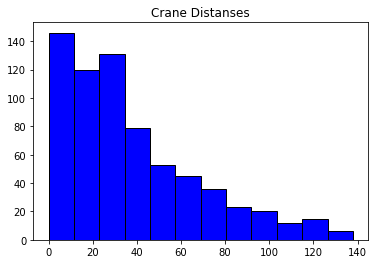

In [18]:
plt.hist(crane_dist, color = 'blue', edgecolor = 'black',
         bins = 12)
plt.title('Crane Distanses')


(array([  1.,   4.,   5.,  29., 122., 129., 104.,  87.,  80.,  56.,  58.,
         11.]),
 array([ 0.        ,  2.35416667,  4.70833333,  7.0625    ,  9.41666667,
        11.77083333, 14.125     , 16.47916667, 18.83333333, 21.1875    ,
        23.54166667, 25.89583333, 28.25      ]),
 <BarContainer object of 12 artists>)

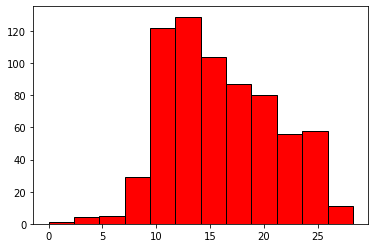

In [19]:
plt.hist(trolley_dist, color = 'red', edgecolor = 'black',
         bins = 12)

(array([ 33.,  30., 134., 253.,   3., 178.,  51.,   0.,   3.,   1.]),
 array([ 9.4 , 11.12, 12.84, 14.56, 16.28, 18.  , 19.72, 21.44, 23.16,
        24.88, 26.6 ]),
 <BarContainer object of 10 artists>)

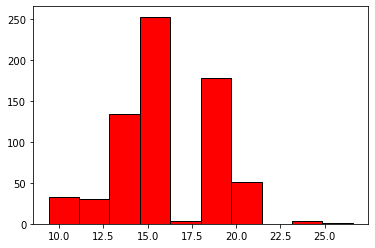

In [20]:
plt.hist(up_down_dist, color = 'red', edgecolor = 'black',
         bins = 10)

In [22]:
data = {'Время цикла' : [], 'Время крана' : [], 'Время тележки' : [], 'Время механизма подъема' : [], 
        'Расстояние хода крана' : [], 'Расстояние телеги' : [], 'Расстояние механизма подъема' : [], 'Шифр цикла' : []}


for i in range(len(pensa_stat.table)):
    data['Время цикла'].append(pensa_stat.table[i][1])
    data['Время крана'].append(pensa_stat.table[i][2])
    data['Время тележки'].append(pensa_stat.table[i][3])
    data['Время механизма подъема'].append(pensa_stat.table[i][4])
    data['Расстояние хода крана'].append(pensa_stat.table_distance[i][1])
    data['Расстояние телеги'].append(pensa_stat.table_distance[i][2])
    data['Расстояние механизма подъема'].append(pensa_stat.table_distance[i][3])
    data['Шифр цикла'].append(pensa_stat.table_distance[i][4])
    
print(min(data['Расстояние хода крана'][1:]))
print(max(data['Расстояние хода крана'][1:]))

df = pd.DataFrame(data)
df.to_excel('./Pensa_stat_3.xlsx')

0.0
149.15


In [28]:
#Муравьиный алгоритм

In [24]:
#Алгоритм по наименьшим расстояниям

class Min_distances(Crane):
    
    '''Принимает на вход: 
            1. положение x крана
            2. Положение y тележки
            3. МАССИВ ссылок на объекты типа Container
            4. Обект типа Crane
    '''
    
    def __init__(self, x_crane, y_crane, train, Crane, stock):
        self.x_crane = x_crane
        self.x_start = copy.copy(x_crane)
        self.y_crane = y_crane
        self.y_start = copy.copy(y_crane)
        self.train = train
        self.Crane = Crane
        self.stock = stock
        self.time_train = []
        self.road = []
        self.box_positions_stock = [0]
        self.box_positions_train = [0]
        self.matrix_final = self.stock.matrix_out.copy()
        self.road_times = [] #последовательная запись времен
        
        #Массивы расстояний нахождения контейнеров на поезде и на складе
        for i in range(len(self.train)):
            self.box_positions_train.append(self.train[i].box_lenght/2 + 1 + self.box_positions_train[i]) # 1 - Среднее расстояние между вагонами/2
        self.box_positions_train.pop(0)
        
        for i in range(len(self.stock.matrix_out)):
            self.box_positions_stock.append(self.stock.row_list[i].box_lenght/2 + 0.2 + self.box_positions_stock[i]) # 0,2 - Среднее расстояние между контейнерами
        self.box_positions_stock.pop(0)
        
        
    def time_to_train(self): #Массив времен от положения крана до поезда 
        for i in range(len(self.train)):
            move_time_crane = self.Crane.crane_move(self.x_crane, self.box_positions_train[i])
            move_time_trolley = self.Crane.trolley_move(self.y_crane, self.Crane.span)
            move_time_down = self.Crane.down_train(0, train_heigh = 1.5) #z - высота опускания/подъема
            self.time_train.append(move_time_crane[1] + 0.5 + move_time_trolley[1] + move_time_down[1]*2) # 0.5 - Время на позиционирование + захват
        return self.time_train
    
    def check(self, index_train, index_stock_x, index_stock_y): #Проверка соответствия по типу контейнера
        if self.matrix_final[index_stock_x][index_stock_y] == 3:
            return False
        elif self.train[index_train].size == self.stock.row_list[index_stock_x].size:
            return True
        else:
            return False
    
    def time_to_box(self): #Массив матриц времен от положения крана до поезда + до ячейки на складе (полный цикл)

        times_list = []
        self.time_to_train()
        
        for i in range(len(self.train)): #поезд
            temp_matrix = np.zeros([self.stock.x, self.stock.y])
            for j in range(len(self.stock.matrix_out)): #Длина склада
                #if self.stock.row_list[j].size == self.train[i].size:
                    for k in range(len(temp_matrix[j])): # ширина склада
                        if self.check(i, j, k) == False:
                            temp_matrix[j][k] = None
                        else:
                            #Расчет движений крана - х и тележки y
                            move_crane_x = self.Crane.crane_move(self.box_positions_train[i], self.box_positions_stock[j])
                            move_crane_y = self.Crane.trolley_move(0, self.train[i].box_width * k + 3)
                            #Движение от поезда (0 - консоль), 3 - длина консоли, до k-го контейнера в ряде
                            #move_crane = move_crane_x[0] + abs(self.x_crane - self.box_positions_train[i])
                            #move_trolley = move_crane_y[0] + abs(self.y_crane - self.train[i].box_width * k)
                            
                            time_x = self.time_train[i] + move_crane_x[1]
                            time_y =  move_crane_y[1]
                            time_down = self.Crane.down_train(self.stock.matrix_out[j][k])
                            
                            temp_matrix[j][k] = time_x + time_y + time_down[1] #вычислить, записать время и остальную статистику
            times_list.append(temp_matrix)
            
        return times_list
    
    def find_min(self): #Генерация вариантов и нахождение минимума, запись индекса мин элемента
        min_time=[]
        temp_time = self.time_to_box()
        #road = [[] for i in range(len(temp_time))]
        temp_min = 100
        temp_road = []
        for i in range(len(temp_time)):
            if self.train[i].size == None:
                continue
            for j in range(len(temp_time[0])):
                for k in range(len(temp_time[0][0])):
                    if temp_time[i][j][k] == None:
                        continue
                    if temp_time[i][j][k] < temp_min:
                        temp_min = temp_time[i][j][k]
                        temp_road = [i, j, k]
                        
        self.road_times.append(temp_min)
        self.road.append(temp_road) #[i, j, k] - i - номер вагона, j - номер ряда (x), k - номер в ряде
        self.x_crane = self.box_positions_stock[temp_road[1]]
        self.y_crane = k * Container.box_width
        self.matrix_final[temp_road[1]][temp_road[2]] += 1
        self.train[temp_road[0]].size = None

        return temp_min
        
    def algoritm_body(self):
        time_sum = 0 
        for i in range(len(self.train)):
            time_sum += self.find_min()
        print(time_sum)
        return time_sum


In [144]:
from copy import deepcopy
from random import randint
import numpy as nm

def matrix_generator(Q, N):
    """Function generates Q matrix with size NxN and pack them into list """

    matrix_list = list()
    for i in range(Q):
        matrix_list.append([])
    for matrix in matrix_list:
        for j in range(N):
            matrix.append([])
    for matrix in matrix_list:
        for line in matrix:
            for k in range(N):
                line.append(randint(0, 9))

    print("Matrix list is: ", matrix_list, "\n")
    return matrix_list


arrays = matrix_generator(3, 3)
result = deepcopy(arrays[0])

for i in range(len(result)):
    for j in range(len(result[i])):
        result[i][j] = "x"


first = arrays[0]
print("First matrix is: ", first, "\n")
# arrays.remove(arrays[0])


for array in arrays:
    # print("Current analyzing array is: ", array)
    for line in array:
        k = array.index(line)
        for item in line:
            l = line.index(item)
            # print(first[k][l], array[k][l])
            if first[k][l] == array[k][l]:
                result[k][l] = first[k][l]
                # print("MATCH!")
            else:
                result[k][l] = "x"


print("Result of compare is", result)

Matrix list is:  [[[8, 1, 8], [6, 5, 0], [4, 5, 3]], [[1, 0, 0], [8, 0, 7], [6, 3, 6]], [[3, 5, 9], [6, 0, 4], [5, 0, 1]]] 

First matrix is:  [[8, 1, 8], [6, 5, 0], [4, 5, 3]] 

Result of compare is [['x', 'x', 'x'], [6, 'x', 'x'], ['x', 'x', 'x']]


In [28]:
original_list = [1, 2, 3, 2, 4, 3, 5]
unique_set = set(original_list)
unique_list = list(unique_set)

print(unique_list)


[1, 2, 3, 4, 5]


In [29]:
original_list = [1, 2, 3, 2, 4, 3, 5]
unique_list = []

for item in original_list:
    if item not in unique_list:
        unique_list.append(item)

print(unique_list)


[1, 2, 3, 4, 5]


In [71]:
code_position = random.choices([1, 2], weights = [80, 20])
print(code_position[0])

1
